## ch4. 신경망 학습 ##

In [1]:
import numpy as np
import sys, os
from scratch.dataset.mnist import load_mnist

from matplotlib import pyplot as plt

### 데이터 불러오기 & 미니배치 형성 ###

In [2]:
sys.path.append(os.getcwd())
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [3]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 60000개 중에서 무작위로 10개 선택

In [ ]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.arange(batch_size)

### loss function ###

In [ ]:
def sum_squares_error(y,t): # prediction, answer
    return 0.5 * np.sum((y-t)**2)

In [ ]:
def cross_entropy_error(y,t): # prediction, answer + mini batch 고려
    
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + np.finfo(float).eps))/batch_size

### sample ###

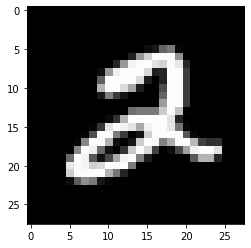

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
from matplotlib import pyplot as plt
sample = x_train[5]
answer = t_train[5]
plt.imshow(sample.reshape(28,28), cmap='gray')
plt.show()
print(answer)

In [55]:
predict(network, sample)

array([2.9110769e-03, 4.3154196e-05, 9.7374129e-01, 6.7519299e-03,
       2.3475666e-05, 2.4955484e-04, 6.6279121e-05, 1.5046659e-03,
       1.3736667e-02, 9.7182038e-04], dtype=float32)

In [54]:
np.argmax(predict(network, sample))

2

In [42]:
import numpy as np
import pickle
from scratch.dataset.mnist import load_mnist
from scratch.common.functions import sigmoid, softmax

In [43]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [44]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [50]:
x, t = x_test, t_test
network = init_network()
accuracy_cnt = 0


for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    answer = np.argmax(t[i])
    if p == answer:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print("sample_weight :", network)

Accuracy:0.9352
sample_weight : {'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05

### 4.3.2 numerical diff ###

In [ ]:
def numerical_diff(f,x): # 중앙차분
    h = 1e-4
    return (f(x+h) - f(x-h)) / 2*h

### cf. machine learning assignment_03_1 ###

In [ ]:
data = np.arange(9).reshape(3,3)
D = np.pad(data, 1, 'edge') # 가장자리에 padding 

In [ ]:
D

In [ ]:
forward = np.roll(D, - 1, axis=1) # 한칸씩 앞으로 민다
backward = np.roll(D, 1, axis=1) # 한칸씩 뒤로 민다

In [ ]:
(forward - D)[1:-1,1:-1]

In [ ]:
(D - backward)[1:-1,1:-1]

### 4.3.3 ###

In [ ]:
def myFun(x):
    return np.sum(x**2)

In [ ]:
x1 = np.linspace(-10,10,100)
x2 = x1
np.stack((x1,x2),axis=1).shape

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1,X2= np.meshgrid(x1,x2)
Y = myFun(X1)

ax.plot3D(X1,X2,Y)
ax.view_init(30,0)

### 편미분 ###

In [64]:
def numerical_gradient(f,x): # 함수, numpy 배열
    h=0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val=x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = ( fxh1 - fxh2 )/ (2*h)
        x[idx] = tmp_val
        
    return grad

In [ ]:
numerical_gradient(myFun, np.array([3.0,4.0]))

### 경사 하강법 ###

In [65]:
def gradient_descent(f, init_x, lr, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        #print(x,lr * grad)
    return x

In [ ]:
def function_2(x): # 1x2 배열
    return x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=100, step_num=100)

In [ ]:
numerical_gradient(myFun, np.array([-3.0,4.0]))

### 4.4.2 신경망에서 기울기 ###

In [ ]:
import sys, os
sys.path.append(os.getcwd())
import numpy as np
from scratch.common.functions import softmax, cross_entropy_error
from scratch.common.gradient import numerical_gradient

In [57]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # parameter input(2)->ouput(3)
        
    def predict(self,x):
        return np.dot(x, self.W) # matmul
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [58]:
net = simpleNet()

In [59]:
print(net.W)

[[-1.10515027  0.66264918 -1.01676441]
 [ 1.57983863  0.48057373  1.2105952 ]]


In [60]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[0.7587646  0.83010586 0.47947704]


In [61]:
t = np.array([0,0,1]) # 정답 label (one-hot encoding)
net.loss(x,t)

1.3196593183858665

In [56]:
def f(W): # W는 dummy
    return net.loss(x,t)

# f = lambda w : net.loss(x,t)

In [66]:
dW = numerical_gradient(f, net.W)
print(dW)

IndexError: index 2 is out of bounds for axis 0 with size 2

w11 w12 w13

w21 w22 w23

w11을 h만큼 증가시키면 손실함수의 값은 0.2h만큼 증가한다. -> w11감소 필요

w13을 h만큼 증가시키면 손실함수의 값은 0.3h만큼 감소한다. -> w13증가 필요

# 4.5 학습 알고리즘 #

In [4]:
import sys, os
sys.path.append(os.getcwd())
from scratch.common.functions import *
from scratch.common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # parameter 초기화
        self.params={}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) +b2
        y = softmax(a2) # last node
        
        return y
    
    def loss(self, x, t): # input, answer
        y = self.predict(x) # prediction
              
        return cross_entropy_error(y, t) # prediction, answer
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 최대값의 index -> 가장 높은 확률로 예상중인 label알 수 있음
        t = np.argmax(t, axis=1) # 최대값의 index -> one-hot encoding 상태이므로 정답의 label알 수 있음
        
        accuracy = np.sum(y==t) / float(x.shape[0]) # label을 맞추었는지 확인(정확도)
        return accuracy
    
    def numerical_gradient(self, x, t):
        
        loss_W = lambda W: self.loss(x,t)
        
        grads={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

### 미니 배치 학습 ###

In [20]:
iter_num=10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

In [21]:
network.params['W1'].shape, network.params['W2'].shape 

((784, 50), (50, 10))

In [22]:
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

In [37]:
iter_num=30

In [38]:
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iter_num):
    
    batch_mask = np.random.choice(train_size, batch_size) # 무작위로 100개의 이미지를 골라 batch생성
    x_batch = x_train[batch_mask] # 손글씨 이미지
    t_batch = t_train[batch_mask] # 정답 label
    
    print(x_batch.shape,t_batch.shape)
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1','b1','W2','b2'): # 매개변수 update
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc:'+str(train_acc)+','+str(test_acc))
        

(100, 784) (100, 10)
train acc, test acc:0.5216666666666666,0.5303
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)
(100, 784) (100, 10)


In [26]:
param1=network.params # train - 0.17, test - 0.17 , 10

In [33]:
param3=network.params # train - 0.49, test - 0.49, 30

In [ ]:
param4=network.params # train - 0.56, test - 0.56 ,40

In [40]:
param5=network.params # train - 0.7, test - 0.7 ,70

In [35]:
train_loss_list

[2.2483378587342915,
 2.253607725198662,
 2.2704129292946895,
 2.285618297268203,
 2.268975792186002,
 2.243899269092901,
 2.2785209811918055,
 2.2832351011121648,
 2.260033911146556,
 2.236477559197491,
 2.2020973693424657,
 2.2794329698041342,
 2.22899643168533,
 2.222941636699214,
 2.2311738052768457,
 2.2012793840479086,
 2.234232356820473,
 2.234802175899468,
 2.200034247003238,
 2.1849586490396535,
 2.1893119121562146,
 2.138833418553514,
 2.0756019913412684,
 2.091331199461656,
 2.0700353780549174,
 2.0524512819427487,
 1.9512483345497877,
 1.9340458184198897,
 1.858997315819782,
 1.873827047257147,
 1.819389952224032,
 1.792701844050374,
 1.7027853740982004,
 1.6813948569159036,
 1.6381352620710792,
 1.5508291020261786,
 1.3609957250804205,
 1.5007642376942163,
 1.4789937091864132,
 1.40591339769341]

In [39]:
network.accuracy(x_train, t_train), network.accuracy(x_test, t_test)

(0.75505, 0.7577)